In [1]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
from robyn.modeling.entities.pareto_result import ParetoResult
from robyn.data.entities.enums import DependentVarType


In [2]:

import pickle
# load the variable from the file
with open("pareto_result.pkl", "rb") as f:
    pareto_result: ParetoResult = pickle.load(f)
with open("mmmdata.pkl", "rb") as f:
    mmm_data = pickle.load(f)


In [3]:
cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-07 01:41:34 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder


2024-11-07 01:41:34 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: mape, pareto, decomp.rssd, nrmse_train, solID, nrmse, nrmse_test, nrmse_val
2024-11-07 01:41:34 - robyn.modeling.clustering.cluster_builder - INFO - >> Auto selected k = 5 (clusters) based on minimum WSS variance
2024-11-07 01:41:34 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: mape, pareto, decomp.rssd, nrmse_train, solID, nrmse, nrmse_test, nrmse_val
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: 

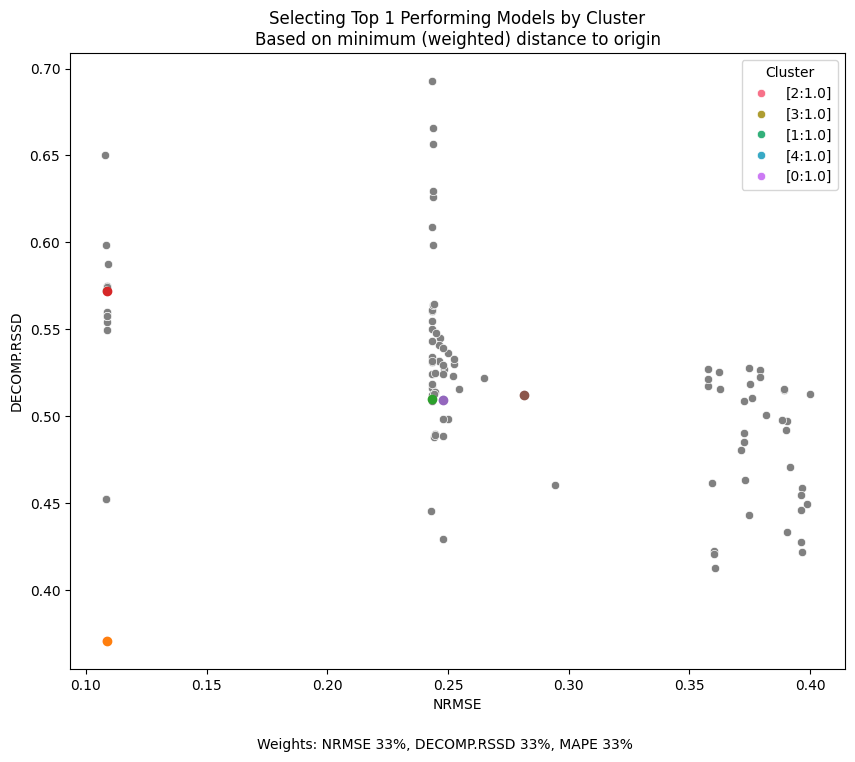

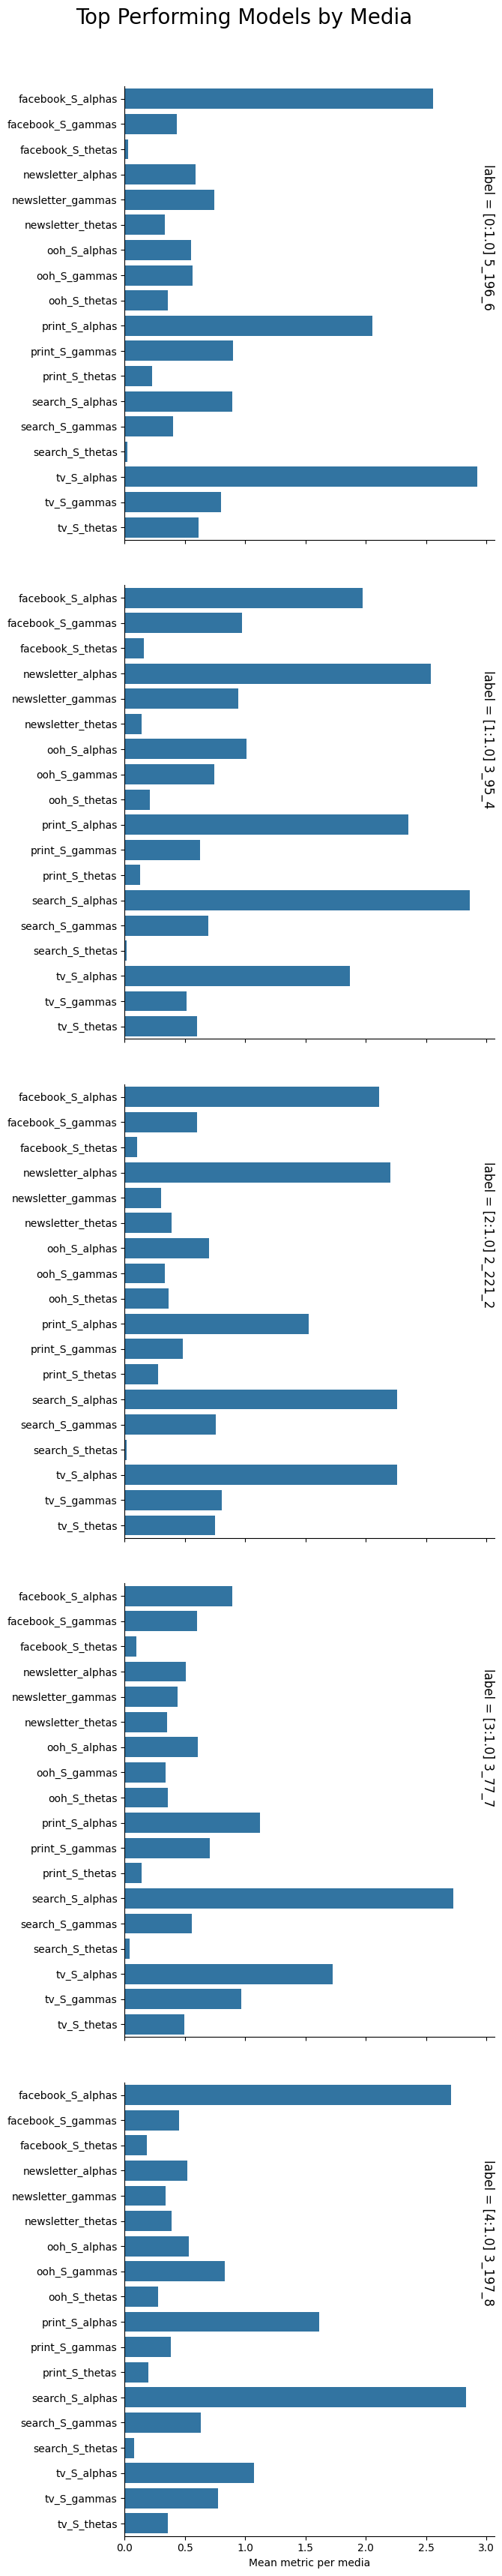

<Figure size 640x480 with 0 Axes>

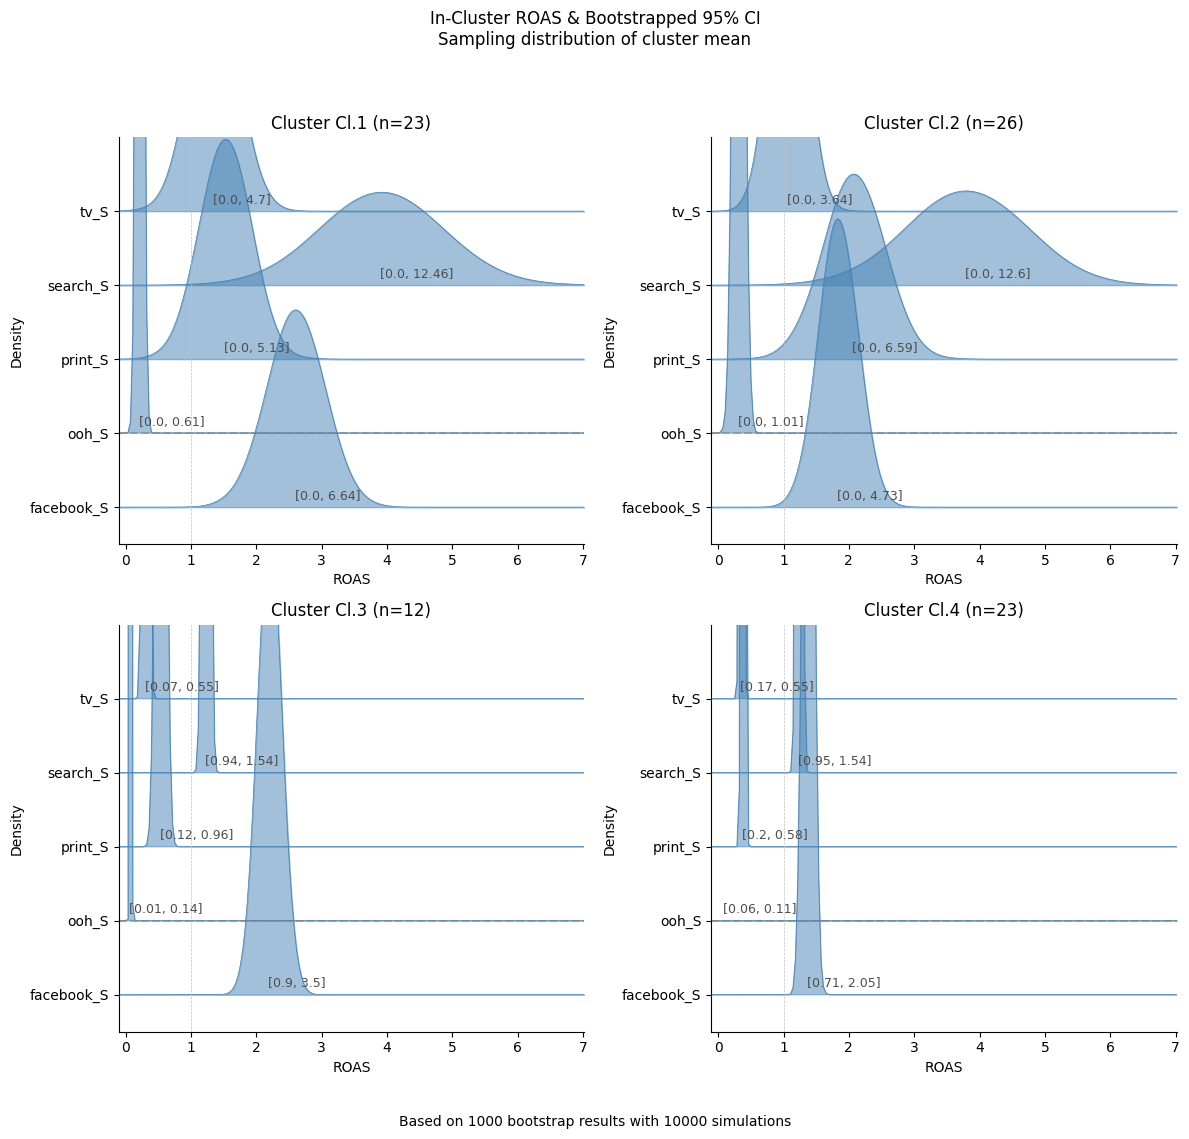

In [4]:
configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 30,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
cluster_results  = cluster_builder.cluster_models(configs)

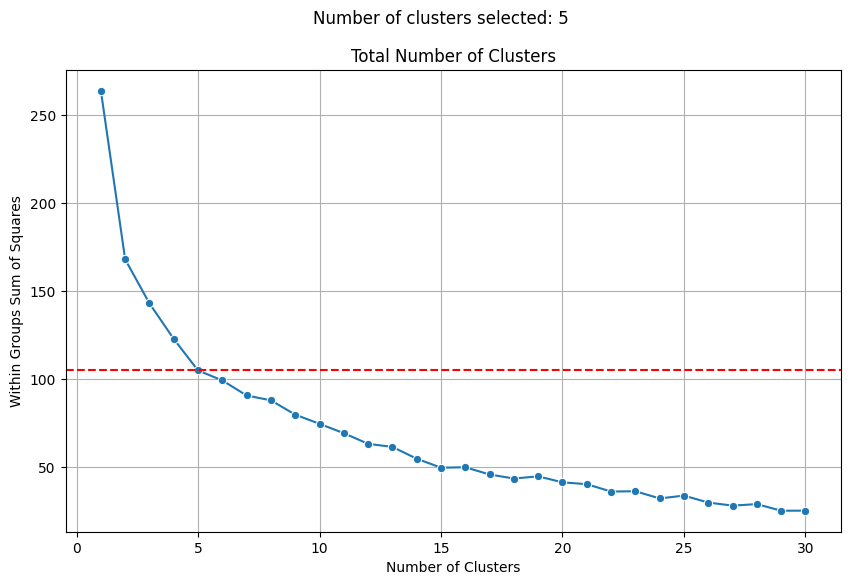

In [5]:
cluster_results.wss

In [6]:
cluster_results.cluster_ci.cluster_confidence_interval_df

,rn,cluster,n,boot_mean,boot_se,boot_ci,ci_low,ci_up,sd,dist100
0,facebook_S,1,23,2.604368,0.404170,"[0.0, 6.64]",0.000000,6.640805,1.895726,0.105376
1,facebook_S,2,26,1.837727,0.274143,"[0.0, 4.73]",0.000000,4.726573,1.370714,0.075434
2,facebook_S,3,12,2.201844,0.170148,"[0.9, 3.5]",0.901839,3.496401,0.564316,0.037608
3,facebook_S,4,23,1.380662,0.067320,"[0.71, 2.05]",0.713087,2.052213,0.315760,0.019906
4,ooh_S,1,23,0.217860,0.039756,"[0.0, 0.61]",0.000000,0.613130,0.186473,0.009960
5,ooh_S,2,26,0.317766,0.066143,"[0.0, 1.01]",0.000000,1.012606,0.330716,0.016909
6,ooh_S,3,12,0.076043,0.008242,"[0.01, 0.14]",0.013036,0.138725,0.027337,0.001822
7,ooh_S,4,23,0.088933,0.002540,"[0.06, 0.11]",0.063594,0.114116,0.011913,0.000751
8,print_S,1,23,1.524358,0.360439,"[0.0, 5.13]",0.000000,5.128100,1.690611,0.085953
9,print_S,2,26,2.073376,0.430961,"[0.0, 6.59]",0.000000,6.586348,2.154804,0.110060


In [7]:
cluster_results.clusters_means

,cluster,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,print_S_gammas,print_S_thetas,search_S_alphas,search_S_gammas,search_S_thetas,tv_S_alphas,tv_S_gammas,tv_S_thetas,mape.qt10,n
0,0,2.065519,0.642241,0.097404,0.680399,0.536435,0.357606,0.621727,0.663758,0.308022,...,0.684375,0.230596,2.317836,0.586147,0.090533,1.835009,0.669830,0.478866,1.0,18
1,1,1.943722,0.762259,0.113008,2.557162,0.873419,0.226618,0.772583,0.563109,0.322057,...,0.585777,0.204286,2.657833,0.796835,0.124656,1.831701,0.558052,0.502155,1.0,23
2,2,2.274734,0.792242,0.140455,2.261968,0.821603,0.266706,0.722357,0.415946,0.346451,...,0.548528,0.213837,2.605233,0.790394,0.103491,2.253987,0.709648,0.569678,1.0,26
3,3,1.185941,0.573032,0.108373,0.602377,0.528204,0.334142,0.828961,0.496816,0.320503,...,0.568174,0.162168,2.600017,0.738978,0.116165,1.429333,0.641685,0.496794,1.0,12
4,4,2.600298,0.590396,0.165259,0.635649,0.475105,0.360861,0.583181,0.602990,0.318084,...,0.553650,0.201526,2.515666,0.759195,0.110883,1.025998,0.807271,0.437350,1.0,23


In [8]:
print("clusters: ", cluster_results.n_clusters,
"\nerror weights/balance: ", cluster_results.errors_weights,
"\nboot_n: ", cluster_results.cluster_ci.boot_n,
"\nsim_n: ", cluster_results.cluster_ci.sim_n)


clusters:  5 
error weights/balance:  [1.0, 1.0, 1.0] 
boot_n:  1000 
sim_n:  10000


In [9]:
cluster_results.cluster_data


,solID,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,nrmse_train,nrmse_val,nrmse_test,nrmse,decomp.rssd,mape,mape.qt10,cluster,n,top_sol
581,1_65_6,1.816538,0.655710,0.282243,0.977079,0.698281,0.389996,0.751347,0.802381,0.383726,...,0.232905,0.249837,0.288892,0.249837,0.536179,70.892934,True,3,12,False
1343,1_150_3,2.817883,0.997139,0.190832,0.785560,0.438935,0.390311,0.627345,0.573152,0.367050,...,0.233498,0.246141,0.296267,0.246141,0.531938,65.780731,True,4,23,False
1403,1_156_9,2.817883,0.997139,0.190832,0.514987,0.607173,0.390311,0.627345,0.573152,0.367050,...,0.233504,0.246173,0.296364,0.246173,0.531946,62.637132,True,4,23,False
1433,1_160_3,2.817883,0.997139,0.190832,0.785560,0.438935,0.390311,0.627345,0.573152,0.367050,...,0.233602,0.246686,0.298407,0.246686,0.545255,65.834692,True,4,23,False
1493,1_166_9,2.140731,0.871110,0.139164,0.698447,0.837714,0.316046,0.689707,0.476237,0.367947,...,0.233461,0.246088,0.296570,0.246088,0.540862,70.679096,True,4,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,5_211_9,1.278330,0.686631,0.133280,0.647806,0.414713,0.308137,0.541218,0.441688,0.313545,...,0.229273,0.252300,0.297076,0.252300,0.530409,68.648979,True,0,18,False
10006,5_220_8,2.147993,0.354322,0.015830,0.678687,0.964952,0.129028,0.571841,0.417467,0.386422,...,0.226063,0.264822,0.302831,0.264822,0.522369,69.144987,True,4,23,False
10012,5_221_5,2.924702,0.540774,0.035944,0.853590,0.693816,0.391377,0.587863,0.443449,0.268736,...,0.234521,0.244178,0.296425,0.244178,0.564497,67.902686,True,4,23,False
10016,5_221_9,1.278330,0.686631,0.133280,0.647806,0.414713,0.308137,0.541218,0.441688,0.313545,...,0.229256,0.252435,0.297507,0.252435,0.533088,68.638174,True,0,18,False


In [10]:
cluster_results.top_solutions

,cluster,rank,solID,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,...,tv_S_thetas,nrmse_train,nrmse_val,nrmse_test,nrmse,decomp.rssd,mape,mape.qt10,n,error_score
9788,0,1.0,5_196_6,2.556395,0.434002,0.030527,0.590808,0.745019,0.333445,0.552210,...,0.611658,0.217770,0.281591,0.311595,0.281591,0.512303,53.371545,True,18,0.322126
4863,1,1.0,3_95_4,1.974575,0.971017,0.158234,2.541337,0.941835,0.139716,1.011983,...,0.602178,0.055255,0.108580,0.060833,0.108580,0.572187,0.850054,True,23,0.208612
3988,2,1.0,2_221_2,2.109582,0.603050,0.103924,2.202599,0.300985,0.386665,0.698711,...,0.752378,0.056223,0.108591,0.043918,0.108591,0.370899,0.971785,True,26,0.000759
4704,3,1.0,3_77_7,0.889766,0.598542,0.099502,0.506427,0.435874,0.351006,0.606769,...,0.493167,0.233806,0.243424,0.295446,0.243424,0.509925,66.430478,True,12,0.368299
5785,4,1.0,3_197_8,2.706660,0.448838,0.181127,0.517983,0.341020,0.390324,0.529455,...,0.360011,0.233996,0.248105,0.293347,0.248105,0.509545,58.063543,True,23,0.334637
